# Exploring DIAN data

In [480]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import sklearn 
import statsmodels.distributions.empirical_distribution as ed 
import seaborn as sns
import numpy as np

In [481]:
imaging_data = pd.read_csv('csv_files/IMAGING_D1804.csv')
clinical_data = pd.read_csv('csv_files/CLINICAL_D1804.csv')
pib_data = pd.read_csv('csv_files/pib_D1804.csv')
fdg_data = pd.read_csv('csv_files/FDG_D1804.csv')
biomarker_data = pd.read_csv('csv_files/BIOMARKER_D1804.csv')
genetic_data = pd.read_csv('csv_files/GENETIC_D1804.csv')

#878 rows per table

/anaconda3/envs/jpserver/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (118,513,519,992,996,998,1000,1002,1004,1006,1010,1012,1014,1016,1020,1022,1024,1040,1042,1044,1048,1116,1118,1135,1142) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [461]:
data_dict = pd.read_excel('csv_files/FINAL_DIAN_DATA_DICTIONARY_DF11.xlsx')

In [462]:
data_dict.columns

Index(['FLDNAME', 'TBLNAME', 'CRFNAME', 'TEXT', 'TYPE', 'LENGTH', 'UNITS',
       'CODE', 'NOTES', 'Core',
       ...
       'Unnamed: 16371', 'Unnamed: 16372', 'Unnamed: 16373', 'Unnamed: 16374',
       'Unnamed: 16375', 'Unnamed: 16376', 'Unnamed: 16377', 'Unnamed: 16378',
       'Unnamed: 16379', 'Unnamed: 16380'],
      dtype='object', length=16381)

In [463]:
data_dict.head()

,FLDNAME,TBLNAME,CRFNAME,TEXT,TYPE,LENGTH,UNITS,CODE,NOTES,Core,...,Unnamed: 16371,Unnamed: 16372,Unnamed: 16373,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380
0,DIANID,DATAFREEZE,ADMIN,Participant's DIAN study ID,N,7,NaN,NaN,NaN,ADMIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEWID09,DATAFREEZE,ADMIN,Blinded ID for DF9,T,6,NaN,NaN,NaN,ADMIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IMAGID,DATAFREEZE,ADMIN,Blinded Imaging ID (Static),T,6,NaN,NaN,NaN,ADMIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SITE,DATAFREEZE,ADMIN,Site code where Participant is registered,N,3,NaN,"010: Columbia University, 011: Washington Univ...",NaN,ADMIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AMEND2,DATAFREEZE,ADMIN,Was Visit After Amendment 2 of Study?,N,2,NaN,0=No; 1= Yes,NaN,ADMIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [482]:
pib_bl_data = pib_data[pib_data['visit'] == "v00"]
cdr0_indices = clinical_data[clinical_data['cdrglob'] == 0.0].index.tolist()
no_mutation_indices = genetic_data[genetic_data['Mutation'] == 0].index.tolist()
# shape: (459, 1057)

In [483]:
len(pib_bl_data.index)

459

In [484]:
pib_bl_data.columns

Index(['newid11', 'visit', 'VISITAGEc', 'visitage', 'visit_date', 'IMAGID',
       'VISIT_QC', 'VISIT_DATE_RT', 'VISIT_TYPE', 'VISIT_STATUS',
       ...
       'PIB_fSUVR_rsf_R_WM_TRANSTMP', 'PIB_fSUVR_rsf_TOT_WM_ROSANTCNG',
       'PIB_fSUVR_rsf_TOT_WM_ROSMIDFRN', 'PIB_fSUVR_rsf_TOT_WM_SUPERFRN',
       'PIB_fSUVR_rsf_TOT_WM_SUPERPRTL', 'PIB_fSUVR_rsf_TOT_WM_SUPERTMP',
       'PIB_fSUVR_rsf_TOT_WM_SUPRAMRGNL', 'PIB_fSUVR_rsf_TOT_WM_TMPPOLE',
       'PIB_fSUVR_rsf_TOT_WM_TRANSTMP', 'PIB_fSUVR_rsf_TOT_CORTMEAN'],
      dtype='object', length=1057)

In [485]:
pib_cols = [x for x in pib_bl_data.columns if "fSUVR_rsf" in x and 'WM' not in x]
#pib_cols = [x for x in pib_cols if any(b in x for b in ["L_CTX", "R_CTX"])]
pib_cols.insert(0, 'newid11')

In [486]:
pib_bl_data = pib_bl_data[pib_cols]

In [487]:
pib_bl_data.shape

(459, 150)

In [488]:
pib_bl_data.columns

Index(['newid11', 'PIB_fSUVR_rsf_TOT_BRAINSTEM', 'PIB_fSUVR_rsf_TOT_CAUD',
       'PIB_fSUVR_rsf_TOT_CBLL_CORTEX', 'PIB_fSUVR_rsf_TOTFS_GYREC',
       'PIB_fSUVR_rsf_TOTFS_TMP', 'PIB_fSUVR_rsf_TOTFS_OCC',
       'PIB_fSUVR_rsf_TOT_CTX_SUPERPRTL', 'PIB_fSUVR_rsf_TOT_CTX_PRECUNEUS',
       'PIB_fSUVR_rsf_TOTFS_PREFRN',
       ...
       'PIB_fSUVR_rsf_R_HIPPOCAMPUS', 'PIB_fSUVR_rsf_R_PALLIDUM',
       'PIB_fSUVR_rsf_R_PUTAMEN', 'PIB_fSUVR_rsf_R_SUBSTNCA_NGRA',
       'PIB_fSUVR_rsf_R_THALAMUS', 'PIB_fSUVR_rsf_R_VENTRALDC',
       'PIB_fSUVR_rsf_TOT_SUBSTNCA_NGRA', 'PIB_fSUVR_rsf_TOT_THALAMUS_PRPR',
       'PIB_fSUVR_rsf_TOT_VENTRALDC', 'PIB_fSUVR_rsf_TOT_CORTMEAN'],
      dtype='object', length=150)

In [489]:
not_null_id = pib_bl_data['newid11'][pib_bl_data['PIB_fSUVR_rsf_L_CTX_ENTORHINAL'].notnull()]
pib_bl_data = pib_bl_data[pib_bl_data['newid11'].isin(not_null_id)]
norm_indices = pib_bl_data.index.intersection(no_mutation_indices)
norm_indices = (norm_indices.intersection(cdr0_indices)).tolist()

In [490]:
len(norm_indices)

141

In [491]:
clinical_data.loc[norm_indices, 'cdrglob'][0:5]

0     0.0
4     0.0
5     0.0
9     0.0
10    0.0
Name: cdrglob, dtype: float64

/anaconda3/envs/jpserver/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


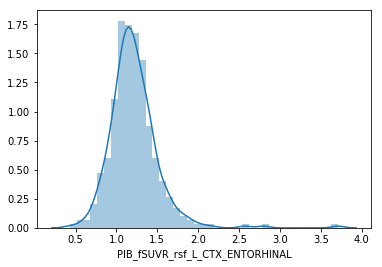

In [492]:
sns.distplot(pib_bl_data.PIB_fSUVR_rsf_L_CTX_ENTORHINAL)

In [493]:
pib_bl_data.shape

(354, 150)

In [494]:
import difflib

In [495]:
hits = ['AMYGDALA', 'CAUD', 'HIPPOCAMPUS', 'PALLIDUM', 'PUTAMEN', 'THALAMUS', 'ACCUMBENS']
subcols = [x for x in pib_bl_data.columns if any([y in x for y in hits]) and all([y not in x for y in ['CTX', 'WM']])]
ctx_cols = [x for x in pib_bl_data.columns if any([y in x for y in ['L_CTX', 'R_CTX', 'TOT_BRAINSTEM']])] 
good_cols = ctx_cols + subcols
pib_bl_data = pib_bl_data[good_cols]
# normalize by brainstem values 
pib_bl_brainstem_data = pib_bl_data.transpose() / pib_bl_data.PIB_fSUVR_rsf_TOT_BRAINSTEM
pib_bl_brainstem_data = pib_bl_brainstem_data.transpose()
good_cols = [x for x in good_cols if 'TOT' not in x]
pib_bl_data = pib_bl_data[good_cols]
pib_bl_brainstem_data = pib_bl_brainstem_data[good_cols]
good_cols = [x.replace('PIB_fSUVR_rsf_','') for x in good_cols]
pib_bl_data = pib_bl_data.set_axis(good_cols, axis='columns', inplace=False)
pib_bl_brainstem_data = pib_bl_brainstem_data.set_axis(good_cols, axis='columns', inplace=False)

In [498]:
len(good_cols)

86

In [500]:
pib_bl_brainstem_data.shape

(354, 86)

In [501]:
# load the spreadsheet containing the label-ROI map for the volumetric DKT atlas
ldf = pd.read_csv('csv_files/dst_labels.csv', header=None)
ldf.columns = ['label','ROI']
ldf.head()

,label,ROI
0,1,Caudal anterior cingulate
1,2,Caudal middle frontal
2,3,Cuneus
3,4,entorinal
4,5,fusiform


In [502]:
# subcortical targets...
ldf.ROI[70:79]

70     Basal forebrain
71            Amygdala
72        Hypothalamus
73             Caudate
74         Hippocampus
75     Globus Pallidus
76             Putamen
77            Thalamus
78        L Cerebellum
Name: ROI, dtype: object

In [503]:
# add hemispheric info
lhctx = ['L_CTX_%s'%x.upper().replace(' ','') for x in ldf.ROI[:31]]
lsc = ['L_%s'%x.upper().replace(' ','') for x in ldf.ROI[31:39]]
rhctx = ['R_CTX_%s'%x.upper().replace(' ','') for x in ldf.ROI[39:70]]
rsc = ['R_%s'%x.upper().replace(' ','') for x in ldf.ROI[70:78]]
ldf.loc[ldf.index[:78],'newlabs'] = lhctx + lsc + rhctx + rsc

In [504]:
# deal with the accumbens 
ldf.loc[ldf.index[31], 'newlabs'] = "L_ACCUMBENS"
ldf.loc[ldf.index[70], 'newlabs'] = "R_ACCUMBENS"

In [505]:
# use difflib to find the best matches for each column
for i,row in ldf.iterrows():
    if i < 78:
        roi = row['newlabs']
        match = difflib.get_close_matches(roi,pib_bl_data.columns)
        if len(match) == 0:
            ldf.loc[i,'matching_lab'] = np.nan
        else:
            ldf.loc[i,'matching_lab'] = match[0]

In [506]:
ldf[1:40]

,label,ROI,newlabs,matching_lab
1,2,Caudal middle frontal,L_CTX_CAUDALMIDDLEFRONTAL,L_CTX_CAUDMIDFRN
2,3,Cuneus,L_CTX_CUNEUS,L_CTX_CUNEUS
3,4,entorinal,L_CTX_ENTORINAL,L_CTX_ENTORHINAL
4,5,fusiform,L_CTX_FUSIFORM,L_CTX_FUSIFORM
5,6,Inferior parietal,L_CTX_INFERIORPARIETAL,L_CTX_INFRPRTL
6,7,Inferior temporal,L_CTX_INFERIORTEMPORAL,L_CTX_INFRTMP
7,8,Isthmus cingulate,L_CTX_ISTHMUSCINGULATE,L_CTX_ISTHMUSCNG
8,9,Lateral Occipital,L_CTX_LATERALOCCIPITAL,L_CTX_LATOCC
9,10,Lateral orbitofronal,L_CTX_LATERALORBITOFRONAL,L_CTX_LATORBFRN
10,11,Lingual gyrus,L_CTX_LINGUALGYRUS,L_CTX_LINGUAL


In [507]:
ldf[41:80]

,label,ROI,newlabs,matching_lab
41,42,Cuneus,R_CTX_CUNEUS,R_CTX_CUNEUS
42,43,entorinal,R_CTX_ENTORINAL,R_CTX_ENTORHINAL
43,44,fusiform,R_CTX_FUSIFORM,R_CTX_FUSIFORM
44,45,Inferior parietal,R_CTX_INFERIORPARIETAL,R_CTX_INFPRTL
45,46,Inferior temporal,R_CTX_INFERIORTEMPORAL,R_CTX_INFTMP
46,47,Isthmus cingulate,R_CTX_ISTHMUSCINGULATE,R_CTX_ISTHMUSCNG
47,48,Lateral Occipital,R_CTX_LATERALOCCIPITAL,R_CTX_LATOCC
48,49,Lateral orbitofronal,R_CTX_LATERALORBITOFRONAL,R_CTX_LATORBFRN
49,50,Lingual gyrus,R_CTX_LINGUALGYRUS,R_CTX_LINGUAL
50,51,Medial orbitofrontal,R_CTX_MEDIALORBITOFRONTAL,R_CTX_MEDORBFRN


In [508]:
ldf.loc[[x for x in ldf.index if not pd.notnull(ldf.loc[x,'matching_lab'])]]

,label,ROI,newlabs,matching_lab
78,79,L Cerebellum,NaN,NaN
79,80,R Cerebellum,NaN,NaN


In [509]:
# deal with the hypothalamus..
ldf.loc[ldf.index[33],'matching_lab'] = np.nan
ldf.loc[ldf.index[72],'matching_lab'] = np.nan

In [510]:
# reindex the spreadsheet
pib_bl_data = pib_bl_data.reindex(columns=ldf.matching_lab.dropna().values)
pib_bl_brainstem_data = pib_bl_brainstem_data.reindex(columns=ldf.matching_lab.dropna().values)

In [512]:
pib_bl_brainstem_data.shape

(354, 76)

In [513]:
# now deal with that weird unidentifiable ROI...
final_cols = pib_bl_data.columns[:33].tolist() + ['MISSING1'] + pib_bl_data.columns[33:71].tolist() + ['MISSING2'] + pib_bl_data.columns[71:].tolist()

In [514]:
pib_bl_data = pib_bl_data.reindex(columns=final_cols)
pib_bl_brainstem_data = pib_bl_brainstem_data.reindex(columns=final_cols)

In [516]:
# how did we do?
list(zip(pib_bl_brainstem_data.columns,ldf.ROI.tolist()))

[('L_CTX_CAUDANTCNG', ' Caudal anterior cingulate'),
 ('L_CTX_CAUDMIDFRN', ' Caudal middle frontal'),
 ('L_CTX_CUNEUS', ' Cuneus'),
 ('L_CTX_ENTORHINAL', ' entorinal'),
 ('L_CTX_FUSIFORM', ' fusiform'),
 ('L_CTX_INFRPRTL', ' Inferior parietal'),
 ('L_CTX_INFRTMP', ' Inferior temporal'),
 ('L_CTX_ISTHMUSCNG', ' Isthmus cingulate'),
 ('L_CTX_LATOCC', ' Lateral Occipital'),
 ('L_CTX_LATORBFRN', ' Lateral orbitofronal'),
 ('L_CTX_LINGUAL', ' Lingual gyrus'),
 ('L_CTX_MEDORBFRN', ' Medial orbitofrontal'),
 ('L_CTX_MIDTMP', ' Middle temporal'),
 ('L_CTX_PARAHPCMPL', ' Parahippocampal'),
 ('L_CTX_PARACNTRL', ' Paracentral '),
 ('L_CTX_PARSOPRCLRS', ' Pars opercularis'),
 ('L_CTX_PARSORBLS', ' Pars orbitalis'),
 ('L_CTX_PARSTRNGLRS', ' Pars triangularis'),
 ('L_CTX_PERICLCRN', ' Pericalcarine'),
 ('L_CTX_POSTCNTRL', ' Postcentral'),
 ('L_CTX_POSTCNG', ' Posterior cingulate'),
 ('L_CTX_PRECNTRL', ' Precentral'),
 ('L_CTX_PRECUNEUS', ' Precuneus'),
 ('L_CTX_ROSANTCNG', ' Rostral anterior cingula

In [517]:
pib_bl_data[np.isnan(pib_bl_data)] = 0
pib_bl_brainstem_data[np.isnan(pib_bl_brainstem_data)] = 0

In [518]:
pib_bl_data.to_csv('dian_pib_roi.csv')
pib_bl_brainstem_data.to_csv('dian_pib_brainstem_roi.csv')

# Convert ROI fSUVR values to probabilities 

In [519]:
import ESM_utils
import pandas as pd
from sklearn.mixture import GaussianMixture
import seaborn as sns

In [520]:
# Note: These are ECDFs for cortical volume
mods = {'two_component': GaussianMixture(n_components=2, random_state=123),
       'one_component': GaussianMixture(n_components=1, random_state=123)}
dian_pib_roi = pd.read_csv('dian_pib_roi.csv', index_col=0)
dian_pib_brainstem_roi = pd.read_csv('dian_pib_brainstem_roi.csv', index_col=0)
dian_pib_roi_norm = dian_pib_roi.loc[norm_indices, :]
dian_pib_brainstem_roi_norm = dian_pib_brainstem_roi.loc[norm_indices, :]
dian_ecdfs = ESM_utils.Convert_ROI_values_to_Probabilities(dian_pib_roi, norm_matrix=dian_pib_roi_norm, target_distribution="right")
dian_brainstem_ecdfs = ESM_utils.Convert_ROI_values_to_Probabilities(dian_pib_brainstem_roi, norm_matrix=dian_pib_brainstem_roi_norm, target_distribution="right")
dian_2comp_probs, report = ESM_utils.Convert_ROI_values_to_Probabilities(dian_pib_roi, models=mods, target_distribution="right")
dian_2comp_brainstem_probs, report_brainstem = ESM_utils.Convert_ROI_values_to_Probabilities(dian_pib_brainstem_roi, models=mods, target_distribution="right")

In [522]:
report_brainstem.head()

,model,n_components,reversed,perc. positive,problem
L_CTX_CAUDANTCNG,two_component,2,False,0.372881,False
L_CTX_CAUDMIDFRN,two_component,2,False,0.324859,False
L_CTX_CUNEUS,two_component,2,False,0.313559,False
L_CTX_ENTORHINAL,two_component,2,True,0.180791,False
L_CTX_FUSIFORM,two_component,2,False,0.276836,False


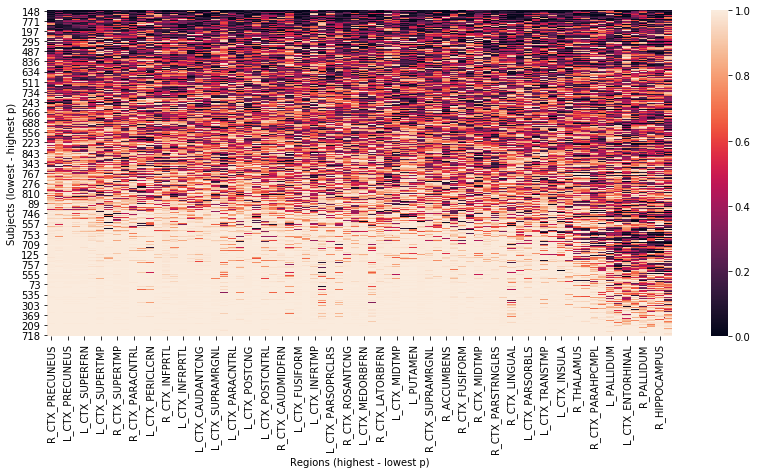

Index(['R_CTX_PRECUNEUS', 'L_CTX_SUPERPRTL', 'L_CTX_PRECUNEUS',
       'R_CTX_SUPERFRN', 'L_CTX_SUPERFRN', 'R_CTX_SUPERPRTL', 'L_CTX_SUPERTMP',
       'L_CAUD', 'R_CTX_SUPERTMP', 'R_CTX_ROSMIDFRN', 'R_CTX_PARACNTRL',
       'R_CTX_PERICLCRN', 'L_CTX_PERICLCRN', 'L_CTX_ROSMIDFRN',
       'R_CTX_INFPRTL', 'L_CTX_CAUDMIDFRN', 'L_CTX_INFRPRTL',
       'L_CTX_ROSANTCNG', 'L_CTX_CAUDANTCNG', 'R_CTX_POSTCNG',
       'L_CTX_SUPRAMRGNL', 'R_CTX_LATOCC', 'L_CTX_PARACNTRL', 'L_CTX_PRECNTRL',
       'L_CTX_POSTCNG', 'R_CAUD', 'L_CTX_POSTCNTRL', 'R_CTX_PRECNTRL',
       'R_CTX_CAUDMIDFRN', 'L_CTX_LATOCC', 'L_CTX_FUSIFORM',
       'R_CTX_CAUDANTCNG', 'L_CTX_INFRTMP', 'R_CTX_CUNEUS',
       'L_CTX_PARSOPRCLRS', 'L_CTX_LINGUAL', 'R_CTX_ROSANTCNG',
       'L_CTX_LATORBFRN', 'L_CTX_MEDORBFRN', 'L_CTX_CUNEUS', 'R_CTX_LATORBFRN',
       'R_CTX_INFTMP', 'L_CTX_MIDTMP', 'R_PUTAMEN', 'L_PUTAMEN',
       'R_CTX_MEDORBFRN', 'R_CTX_SUPRAMRGNL', 'R_CTX_POSTCNTRL', 'R_ACCUMBENS',
       'R_CTX_PARSORBLS', 'R_CTX_

In [523]:
# ECDFS, normalized to cerebellum
ESM_utils.Plot_Probabilities(dian_ecdfs)

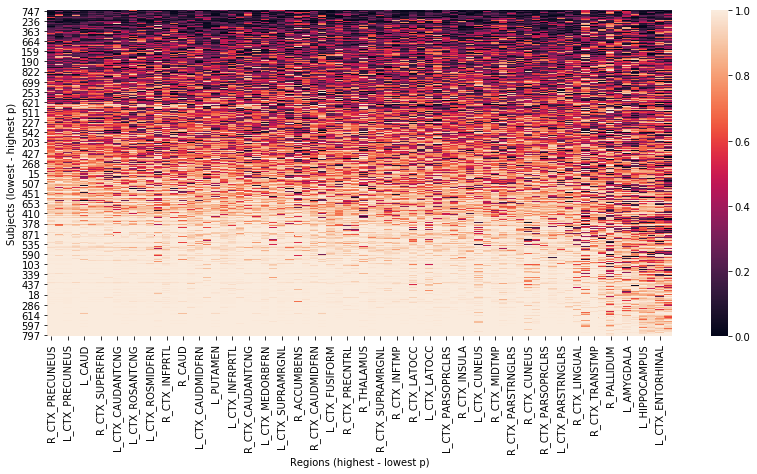

Index(['R_CTX_PRECUNEUS', 'L_CTX_SUPERPRTL', 'L_CTX_PRECUNEUS',
       'R_CTX_SUPERPRTL', 'L_CAUD', 'L_CTX_SUPERFRN', 'R_CTX_SUPERFRN',
       'R_CTX_PARACNTRL', 'L_CTX_CAUDANTCNG', 'R_CTX_ROSMIDFRN',
       'L_CTX_ROSANTCNG', 'R_CTX_POSTCNG', 'L_CTX_ROSMIDFRN', 'L_THALAMUS',
       'R_CTX_INFPRTL', 'L_CTX_POSTCNG', 'R_CAUD', 'R_CTX_SUPERTMP',
       'L_CTX_CAUDMIDFRN', 'R_CTX_PERICLCRN', 'L_PUTAMEN', 'L_CTX_SUPERTMP',
       'L_CTX_INFRPRTL', 'L_CTX_PARACNTRL', 'R_CTX_CAUDANTCNG', 'R_PUTAMEN',
       'L_CTX_MEDORBFRN', 'L_CTX_PERICLCRN', 'L_CTX_SUPRAMRGNL',
       'R_CTX_ROSANTCNG', 'R_ACCUMBENS', 'R_CTX_MEDORBFRN', 'R_CTX_CAUDMIDFRN',
       'L_ACCUMBENS', 'L_CTX_FUSIFORM', 'L_CTX_INFRTMP', 'R_CTX_PRECNTRL',
       'L_CTX_PRECNTRL', 'R_THALAMUS', 'R_CTX_ISTHMUSCNG', 'R_CTX_SUPRAMRGNL',
       'L_CTX_MIDTMP', 'R_CTX_INFTMP', 'L_CTX_LATORBFRN', 'R_CTX_LATOCC',
       'R_CTX_LATORBFRN', 'L_CTX_LATOCC', 'R_CTX_PARSORBLS',
       'L_CTX_PARSOPRCLRS', 'L_CTX_POSTCNTRL', 'R_CTX_INSULA',
   

In [524]:
# ECDFS, normalized to brainstem
ESM_utils.Plot_Probabilities(dian_brainstem_ecdfs)

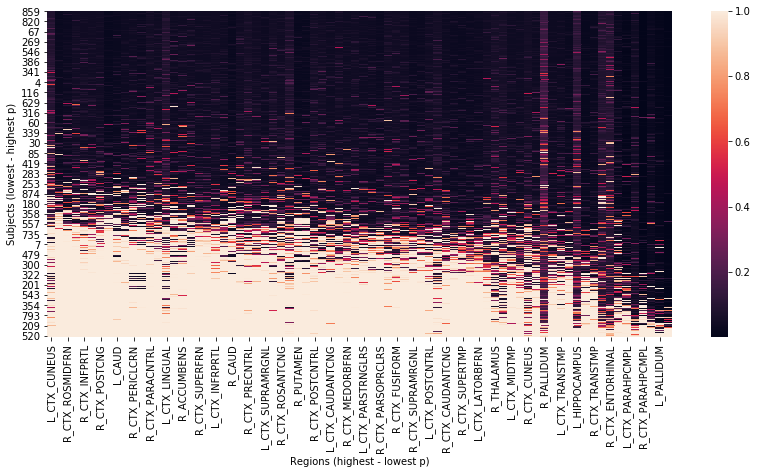

Index(['L_CTX_CUNEUS', 'L_CTX_PRECUNEUS', 'R_CTX_ROSMIDFRN', 'L_CTX_SUPERPRTL',
       'R_CTX_INFPRTL', 'R_CTX_SUPERPRTL', 'R_CTX_POSTCNG', 'R_CTX_PRECUNEUS',
       'L_CAUD', 'L_CTX_ROSMIDFRN', 'R_CTX_PERICLCRN', 'L_CTX_PERICLCRN',
       'R_CTX_PARACNTRL', 'L_CTX_POSTCNG', 'L_CTX_LINGUAL', 'L_ACCUMBENS',
       'R_ACCUMBENS', 'L_CTX_PARACNTRL', 'R_CTX_SUPERFRN', 'L_CTX_SUPERFRN',
       'L_CTX_INFRPRTL', 'L_CTX_ROSANTCNG', 'R_CAUD', 'L_CTX_CAUDMIDFRN',
       'R_CTX_PRECNTRL', 'R_CTX_CAUDMIDFRN', 'L_CTX_SUPRAMRGNL',
       'L_CTX_PRECNTRL', 'R_CTX_ROSANTCNG', 'L_CTX_LATOCC', 'R_PUTAMEN',
       'L_PUTAMEN', 'R_CTX_POSTCNTRL', 'R_CTX_MIDTMP', 'L_CTX_CAUDANTCNG',
       'R_CTX_INFTMP', 'R_CTX_MEDORBFRN', 'L_CTX_FUSIFORM',
       'L_CTX_PARSTRNGLRS', 'R_CTX_PARSTRNGLRS', 'R_CTX_PARSOPRCLRS',
       'R_CTX_PARSORBLS', 'R_CTX_FUSIFORM', 'R_CTX_LATORBFRN',
       'R_CTX_SUPRAMRGNL', 'L_CTX_PARSOPRCLRS', 'L_CTX_POSTCNTRL',
       'R_CTX_LATOCC', 'R_CTX_CAUDANTCNG', 'L_CTX_SUPERTMP', 'R_CTX_

In [525]:
# Bimodal distribution, normalized to cerebellum
ESM_utils.Plot_Probabilities(dian_2comp_probs)

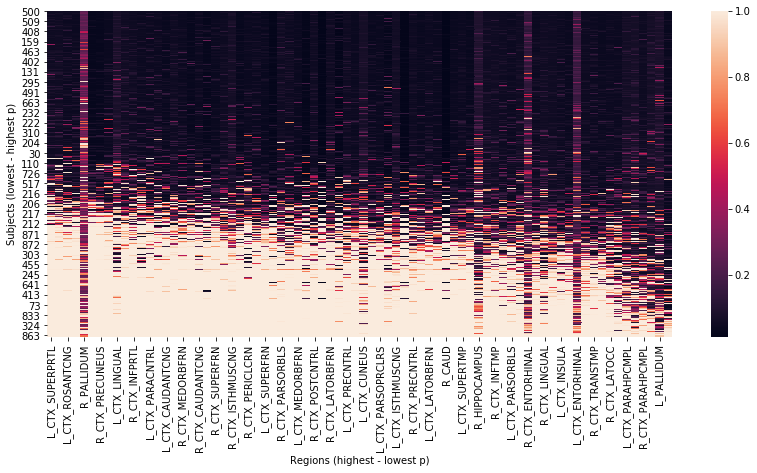

Index(['L_CTX_SUPERPRTL', 'R_CTX_SUPERPRTL', 'L_CTX_ROSANTCNG',
       'L_CTX_POSTCNG', 'R_PALLIDUM', 'L_CTX_PRECUNEUS', 'R_CTX_PRECUNEUS',
       'R_CTX_POSTCNG', 'L_CTX_LINGUAL', 'R_CTX_PARACNTRL', 'R_CTX_INFPRTL',
       'L_CTX_PERICLCRN', 'L_CTX_PARACNTRL', 'R_CTX_ROSANTCNG',
       'L_CTX_CAUDANTCNG', 'L_CTX_INFRPRTL', 'R_CTX_MEDORBFRN',
       'R_CTX_ROSMIDFRN', 'R_CTX_CAUDANTCNG', 'R_ACCUMBENS', 'R_CTX_SUPERFRN',
       'R_CTX_SUPERTMP', 'R_CTX_ISTHMUSCNG', 'L_CTX_ROSMIDFRN',
       'R_CTX_PERICLCRN', 'R_CTX_PARSTRNGLRS', 'L_CTX_SUPERFRN', 'R_PUTAMEN',
       'R_CTX_PARSORBLS', 'L_CTX_POSTCNTRL', 'L_CTX_MEDORBFRN', 'L_ACCUMBENS',
       'R_CTX_POSTCNTRL', 'L_CAUD', 'R_CTX_LATORBFRN', 'R_THALAMUS',
       'L_CTX_PRECNTRL', 'L_CTX_SUPRAMRGNL', 'L_CTX_CUNEUS',
       'L_CTX_PARSTRNGLRS', 'L_CTX_PARSOPRCLRS', 'L_THALAMUS',
       'L_CTX_ISTHMUSCNG', 'L_PUTAMEN', 'R_CTX_PRECNTRL', 'R_CTX_CAUDMIDFRN',
       'L_CTX_LATORBFRN', 'L_CTX_CAUDMIDFRN', 'R_CAUD', 'R_CTX_SUPRAMRGNL',
       '

In [526]:
# Bimodal distribution, normalized to brainstem
ESM_utils.Plot_Probabilities(dian_2comp_brainstem_probs)

/anaconda3/envs/jpserver/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


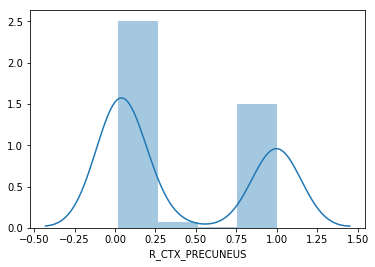

In [529]:
sns.distplot(dian_2comp_probs.R_CTX_PRECUNEUS)

/anaconda3/envs/jpserver/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


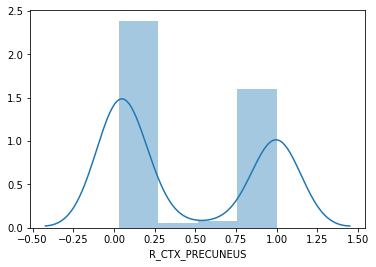

In [530]:
sns.distplot(dian_2comp_brainstem_probs.R_CTX_PRECUNEUS)

/anaconda3/envs/jpserver/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


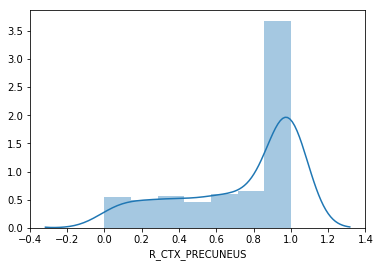

In [531]:
sns.distplot(dian_ecdfs.R_CTX_PRECUNEUS)

/anaconda3/envs/jpserver/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


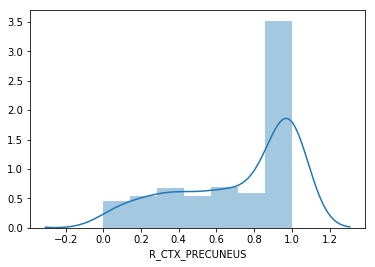

In [532]:
sns.distplot(dian_brainstem_ecdfs.R_CTX_PRECUNEUS)

In [1]:
carrier_indices = genetic_data[genetic_data['Mutation'] == 1].index.tolist()
carrier_indices = (dian_brainstem_ecdfs.index.intersection(carrier_indices)).tolist()
eyo = clinical_data.parental_eyo[carrier_indices]
ages = clinical_data.VISITAGEc[carrier_indices]

NameError: name 'genetic_data' is not defined

In [585]:
len(ages)

206

### To do:
Launch 8 models (for carriers), varying on the following parameters:
* n_components (ECDF or forced 2),
* reference region (cerebellum or brainstem)
* age and EYO 

In [583]:
output_dir = 'testing_tmp'
conn_matrices = ['connectivity_CMU60DSI/Matrix_ACP.mat', 'connectivity_CMU60DSI/Matrix_LONG.mat']
conn_mat_names = ['Map', 'Map']
conn_out_names = ['ACP', 'LONG']

new connectivity matrix size: for ACP (76, 76)


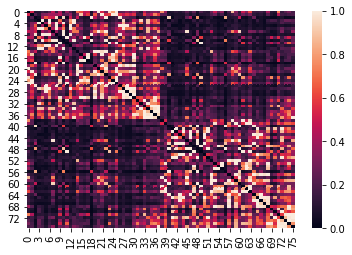

new connectivity matrix size: for LONG (76, 76)


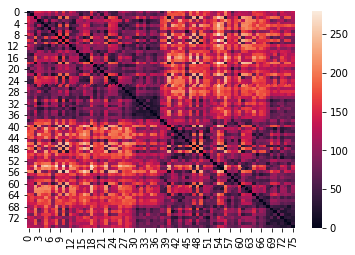

ESM input written to testing_tmp/esm_dian_2comp_brainstem_ages.mat
===inputs:===
test_data
ACP
LONG
ages
===connectivity matrices===
testing_tmp/ACP.mat
testing_tmp/LONG.mat
new connectivity matrix size: for ACP (76, 76)


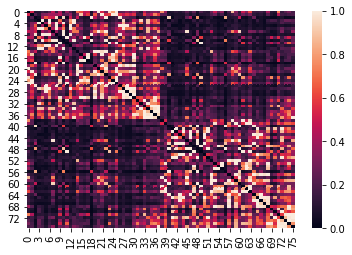

new connectivity matrix size: for LONG (76, 76)


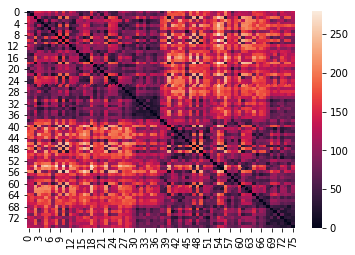

ESM input written to testing_tmp/esm_dian_2comp_brainstem_eyo.mat
===inputs:===
test_data
ACP
LONG
ages
===connectivity matrices===
testing_tmp/ACP.mat
testing_tmp/LONG.mat
new connectivity matrix size: for ACP (76, 76)


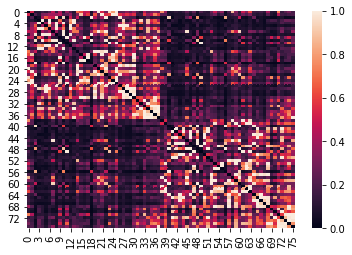

new connectivity matrix size: for LONG (76, 76)


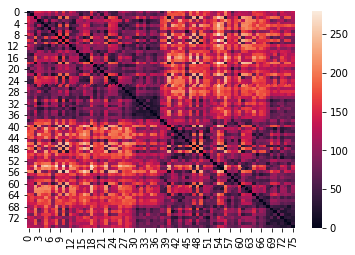

ESM input written to testing_tmp/esm_dian_2comp_cereb_ages.mat
===inputs:===
test_data
ACP
LONG
ages
===connectivity matrices===
testing_tmp/ACP.mat
testing_tmp/LONG.mat
new connectivity matrix size: for ACP (76, 76)


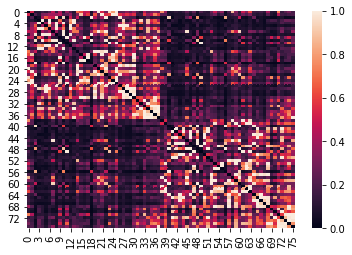

new connectivity matrix size: for LONG (76, 76)


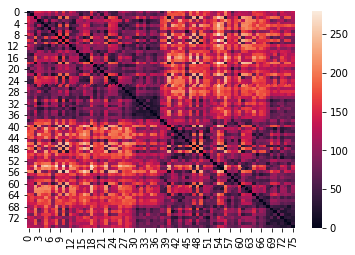

ESM input written to testing_tmp/esm_dian_2comp_cereb_eyo.mat
===inputs:===
test_data
ACP
LONG
ages
===connectivity matrices===
testing_tmp/ACP.mat
testing_tmp/LONG.mat
new connectivity matrix size: for ACP (76, 76)


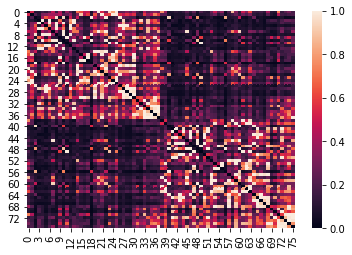

new connectivity matrix size: for LONG (76, 76)


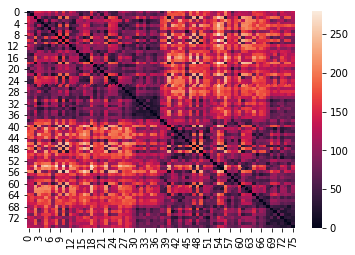

ESM input written to testing_tmp/esm_dian_ecdfs_brainstem_ages.mat
===inputs:===
test_data
ACP
LONG
ages
===connectivity matrices===
testing_tmp/ACP.mat
testing_tmp/LONG.mat
new connectivity matrix size: for ACP (76, 76)


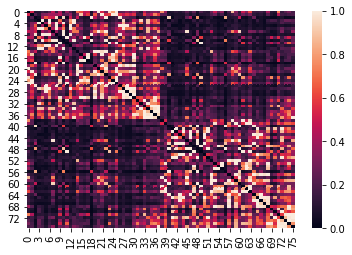

new connectivity matrix size: for LONG (76, 76)


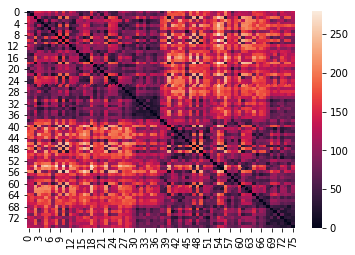

ESM input written to testing_tmp/esm_dian_ecdfs_brainstem_eyo.mat
===inputs:===
test_data
ACP
LONG
ages
===connectivity matrices===
testing_tmp/ACP.mat
testing_tmp/LONG.mat
new connectivity matrix size: for ACP (76, 76)


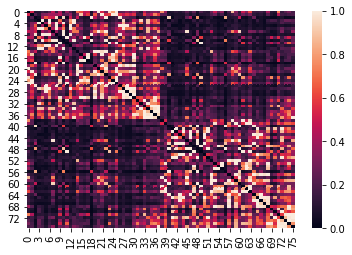

new connectivity matrix size: for LONG (76, 76)


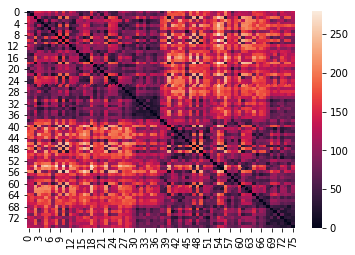

ESM input written to testing_tmp/esm_dian_ecdfs_cereb_ages.mat
===inputs:===
test_data
ACP
LONG
ages
===connectivity matrices===
testing_tmp/ACP.mat
testing_tmp/LONG.mat
new connectivity matrix size: for ACP (76, 76)


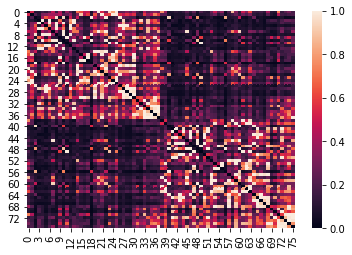

new connectivity matrix size: for LONG (76, 76)


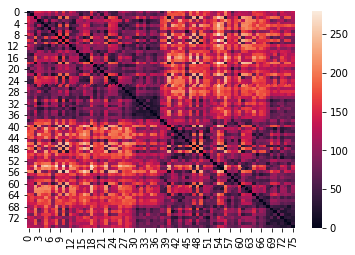

ESM input written to testing_tmp/esm_dian_ecdfs_cereb_eyo.mat
===inputs:===
test_data
ACP
LONG
ages
===connectivity matrices===
testing_tmp/ACP.mat
testing_tmp/LONG.mat


In [584]:
prob_matrices = [dian_2comp_brainstem_probs, dian_2comp_probs, dian_brainstem_ecdfs, dian_ecdfs]
file_names = ['esm_dian_2comp_brainstem_ages.mat','esm_dian_2comp_brainstem_eyo.mat', 'esm_dian_2comp_cereb_ages.mat',  'esm_dian_2comp_cereb_eyo.mat',
             'esm_dian_ecdfs_brainstem_ages.mat', 'esm_dian_ecdfs_brainstem_eyo.mat', 'esm_dian_ecdfs_cereb_ages.mat', 'esm_dian_ecdfs_cereb_eyo.mat']
times = [ages, eyo]
j = 0
for matrix in prob_matrices:
    for i in times:
        ESM_utils.Prepare_Inputs_for_ESM({'test_data': matrix.loc[carrier_indices,:]}, i, output_dir, file_names[j], 
                           conn_matrices, conn_mat_names, conn_out_names)  
        j += 1